<a href="https://colab.research.google.com/github/akhiluthappa1/data_science/blob/main/Akhil_Uthappa_normalisation_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

136 112


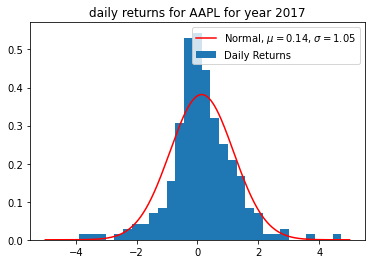

In [ ]:
from pandas_datareader import data as web
import os
import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm

# modify these locations for your directories
ticker='AAPL'
cur_dir  = os.getcwd()
ticker_file = os.path.join('/content/AAPL' + '.csv')


try:   
    df = pd.read_csv(ticker_file)
    df_copy = df.copy()
    pos_1 = len(df[df['Return'] > 0])
    neg_1 = len(df[df['Return'] < 0])
    df['Return'] = 100.0 * df['Return']
    year = '2017'
    start_date=year + '-01-01'; 
    end_date=year + '-12-31'
    df = df[df['Date'] >= start_date]
    df = df[df['Date'] <= end_date]
    low_return = -5
    high_return = 5
    df = df[(df['Return']>low_return) & (df['Return'] < high_return)]
    fig = plt.figure()
    returns_list = df['Return'].values
    plt.hist(returns_list, density=True, bins = 30, label='Daily Returns')
    x = np.linspace(low_return, high_return, 1000)
    pos = len(df[df['Return'] > 0])
    neg = len(df[df['Return'] < 0])
    print(pos, neg)
    ticker_mean = df['Return'].mean()
    ticker_std = df['Return'].std()

    plt.plot(x, norm.pdf(x, ticker_mean,ticker_std), color='red',
         label='Normal, ' + r'$\mu=$' + str(round(ticker_mean,2)) +  
         ', ' + r'$\sigma=$' + str(round(ticker_std,2)))
    plt.title('daily returns for ' + ticker +  ' for year ' +  year)
    plt.legend()
    output_file = os.path.join(cur_dir, 'returns_' + year + '_' + ticker + '_' + str(year) + '.pdf')
    plt.savefig(output_file)

    
except Exception as e:
    print(e)
    print('failed to read stock data for ticker: ', ticker)















### 1. for every year (out of 5 years), compute the number of days with positive and negative returns.

In [ ]:
df_2017 = df_copy[df_copy['Year']==2017]
df_2018 = df_copy[df_copy['Year']==2018]
df_2019 = df_copy[df_copy['Year']==2019]
df_2020 = df_copy[df_copy['Year']==2020]
df_2021 = df_copy[df_copy['Year']==2021]

pos_2017 = len(df_2017[df_2017['Return'] > 0])
neg_2017 = len(df_2017[df_2017['Return'] < 0])

pos_2018 = len(df_2018[df_2018['Return'] > 0])
neg_2018 = len(df_2018[df_2018['Return'] < 0])

pos_2019 = len(df_2019[df_2019['Return'] > 0])
neg_2019 = len(df_2019[df_2019['Return'] < 0])

pos_2020 = len(df_2020[df_2020['Return'] > 0])
neg_2020 = len(df_2020[df_2020['Return'] < 0])

pos_2021 = len(df_2021[df_2021['Return'] > 0])
neg_2021 = len(df_2021[df_2021['Return'] < 0])



print("Positive days and Negative days in 2017 respectively---->\n", pos_2017, neg_2017)
print("\nPositive days and Negative days in 2018 respectively---->\n\n", pos_2018, neg_2018)
print("\nPositive days and Negative days in 2018 respectively---->\n\n", pos_2019, neg_2019)
print("\nPositive days and Negative days in 2018 respectively---->\n\n", pos_2020, neg_2020)
print("\nPositive days and Negative days in 2018 respectively---->\n\n", pos_2021, neg_2021)

Positive days and Negative days in 2017 respectively---->
 137 112

Positive days and Negative days in 2018 respectively---->

 129 122

Positive days and Negative days in 2018 respectively---->

 147 105

Positive days and Negative days in 2018 respectively---->

 137 115

Positive days and Negative days in 2018 respectively---->

 134 117


### 2. for each year, compute the average of daily returns μ and compute the percentage of days with returns greater than μ and the proportion of days with returns less than μ. Are there more positive or negative return days? Does it change from year to year? Summarize your results for this question in a table for each year and discuss your findings. Your table should have the following format: 
year tradingdays μ %days<μ %days>μ


In [ ]:


def get_data(year):
  df_test = df_copy[df_copy['Year']==year]
  higher = len(df_test[df_test['Return'] > df_test['Return'].mean()])
  lower = len(df_test[df_test['Return'] < df_test['Return'].mean()])
  higher = (higher/len(df_test))*100
  lower = (lower/len(df_test))*100
  pos_1 = len(df_test[df_test['Return'] > 0])
  neg_1 = len(df_test[df_test['Return'] < 0])
  count = len(df_test)
  mean = df_test['Return'].mean()
  std = df_test['Return'].std()
  higher_std = len(df_test[df_test['Return'] > df_test['Return'].mean()])
  lower = len(df_test[df_test['Return'] < df_test['Return'].mean()])
  higher = (higher/len(df_test))*100
  lower = (lower/len(df_test))*100
  return higher, lower, count, mean, std

# print(df_2017['Return'].mean())
# pos_1 = len(df[df['Return'] > 0])
# neg_1 = len(df[df['Return'] < 0])
answer_2017 = get_data(2017)
answer_2018 = get_data(2018)
answer_2019 = get_data(2019)
answer_2020 = get_data(2020)
answer_2021 = get_data(2021)
d = {
     'Year': ['2017', '2018', '2019', '2020', '2021'],
     'trading_days': [answer_2017[2], answer_2018[2], answer_2019[2], answer_2020[2], answer_2021[2]],
     'mean': [answer_2017[3], answer_2018[3], answer_2019[3], answer_2020[3], answer_2021[3]],
     '% days greater than mean':[answer_2017[0], answer_2018[0], answer_2019[0], answer_2020[0], answer_2021[0]],
     '% days lesser than mean': [answer_2017[1], answer_2018[1], answer_2019[1], answer_2020[1], answer_2021[1]]
}
df_table = pd.DataFrame(data=d)
df_table

,Year,trading_days,mean,% days greater than mean,% days lesser than mean
0,2017,251,0.001625,18.571134,53.386454
1,2018,251,-0.000057,20.475865,48.605578
2,2019,252,0.002665,19.998740,49.603175
3,2020,253,0.002807,19.528504,50.592885
4,2021,251,0.001325,20.158410,49.402390


### 3. for every year, compute the mean and standard deviation of your daily returns. Compute the number of days that your (by absolute value) returns are more than 2 standard deviations from the mean. In other words, if μ = 5 and σ = 2, compute the number of days that your (percent) daily returns are less than 1 (5 - 2*2) or more than 9 (5 + 2*2). The number of such days per year predicted by normal distribution is less than 5% (out of 252 trading days) - 2.5% below μ−2σ and 2.5% above μ+2σ.

In [ ]:
more_2017 = len(df_copy[df_copy['Return'] > abs(2*answer_2017[4]+answer_2017[4])])
less_2017 = len(df_copy[df_copy['Return'] < abs(2*answer_2017[4]-answer_2017[4])])
more_2017 = (more_2017/len(df_copy))*100
less_2017 = (less_2017/len(df_copy))*100

more_2018 = len(df_copy[df_copy['Return'] > abs(2*answer_2018[4]+answer_2018[4])])
less_2018 = len(df_copy[df_copy['Return'] < abs(2*answer_2018[4]-answer_2018[4])])
more_2018 = (more_2018/len(df_copy))*100
less_2018 = (less_2018/len(df_copy))*100

more_2019 = len(df_copy[df_copy['Return'] > abs(2*answer_2019[4]+answer_2019[4])])
less_2019 = len(df_copy[df_copy['Return'] < abs(2*answer_2019[4]-answer_2019[4])])
more_2019 = (more_2019/len(df_copy))*100
less_2019 = (less_2019/len(df_copy))*100

more_2020 = len(df_copy[df_copy['Return'] > abs(2*answer_2020[4]+answer_2020[4])])
less_2020 = len(df_copy[df_copy['Return'] < abs(2*answer_2020[4]-answer_2020[4])])
more_2020 = (more_2020/len(df_copy))*100
less_2020 = (less_2020/len(df_copy))*100

more_2021 = len(df_copy[df_copy['Return'] > abs(2*answer_2021[4]+answer_2021[4])])
less_2021 = len(df_copy[df_copy['Return'] < abs(2*answer_2021[4]-answer_2021[4])])
more_2021 = (more_2021/len(df_copy))*100
less_2021 = (less_2021/len(df_copy))*100

### 4. Summarize your findings in a table for each year and discuss your findings
year tradingdays μ σ %days<μ−2σ %days>μ+2σ
   

In [ ]:
d1 = {
     'Year': ['2017', '2018', '2019', '2020', '2021'],
     'trading_days': [answer_2017[2], answer_2018[2], answer_2019[2], answer_2020[2], answer_2021[2]],
     'mean': [answer_2017[3], answer_2018[3], answer_2019[3], answer_2020[3], answer_2021[3]],
     'STD': [answer_2017[4], answer_2018[4], answer_2019[4], answer_2020[4], answer_2021[4]],
     '% days greater than μ+2σ':[more_2017, more_2018, more_2019, more_2020, more_2021],
     '% days lesser than μ-2σ': [less_2017, less_2018, less_2019, less_2020, less_2021]
}

df_table = pd.DataFrame(data=d1)
df_table

,Year,trading_days,mean,STD,% days greater than μ+2σ,% days lesser than μ-2σ
0,2017,251,0.001625,0.011091,3.815580,75.119237
1,2018,251,-0.000057,0.018106,0.874404,86.406995
2,2019,252,0.002665,0.016466,1.271860,84.101749
3,2020,253,0.002807,0.029387,0.317965,94.992051
4,2021,251,0.001325,0.015841,1.351351,83.465819
